<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Machine%20Learning/Previsao/Multiplas_Dimensionalidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 8 color = 'Blue'> Muitas Dimensões</font>

#Sobre o Autor e o Notebook
Neste notebook contém estudos a respeito de como lidar com dados de múltiplas dimensionalidades, utilizando a biblioteca scikit-learn.

Este notebook possuirá diversas referencias, sendo uma delas o curso de machine learning da Alura. Sobre o autor há informações abaixo.

<font size =4> Autor: Kaue Hermann Abbehausen</font>

<font size =4> Linkedin: https://www.linkedin.com/in/kaue-abbehausen-5b1922165/</font>

# O que é multípla dimensionalidade

* Uma dimensão é uma variável existendo no dataset. É um grau de liberdade. Múltipla dimensionalidade é o dataset com diversas dimensões

* É importante que façamos diminuição da dimensionalidade, pois assim melhora o machine Learning e diminui o armazenamento

# Importando Bibliotecas e datasets


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
url ='https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'
dados = pd.read_csv(url)
pd.set_option('display.max_columns',40)

In [3]:
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


Neste dataset queremos fazer um aprendizado que diagnostica o tipo de câncer baseado em 33 exames médicos.

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

Como a coluna 34 tem muito valor NaN vou excluir essa coluna

In [5]:
dados_v1 = dados.drop(['exame_33'], axis = 1)

# Separar em dados de teste e dados de treino

In [6]:
x = dados_v1.drop(['id','diagnostico'], axis = 1)
y = dados_v1.diagnostico
np.random.seed(123143)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 123143)

#Criando Modelo Random Forest
É um modelo de várias árvores de decisão

In [7]:
from sklearn.ensemble import RandomForestClassifier


In [8]:
classificador = RandomForestClassifier(n_estimators = 100)

classificador.fit(x_treino,y_treino)

print('Resultado da Classificação: %.2f%%' %(classificador.score(x_teste, y_teste)*100))

Resultado da Classificação: 91.81%


In [9]:
print('Resultado da Classificação: %.2f%%' %(classificador.score(x_teste, y_teste)*100))

Resultado da Classificação: 91.81%


# Criando Classificador Base Line

In [10]:
from sklearn.dummy import DummyClassifier

In [12]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(x_treino, y_treino)
print('Resultado da Classificação Dummy: %.2f%%' %(dummy.score(x_teste, y_teste)*100))

Resultado da Classificação Dummy: 66.67%


# Análise Exploratória
Esta etapa deve vir antes da criação do Modelo

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

(-3.0, 3.0)

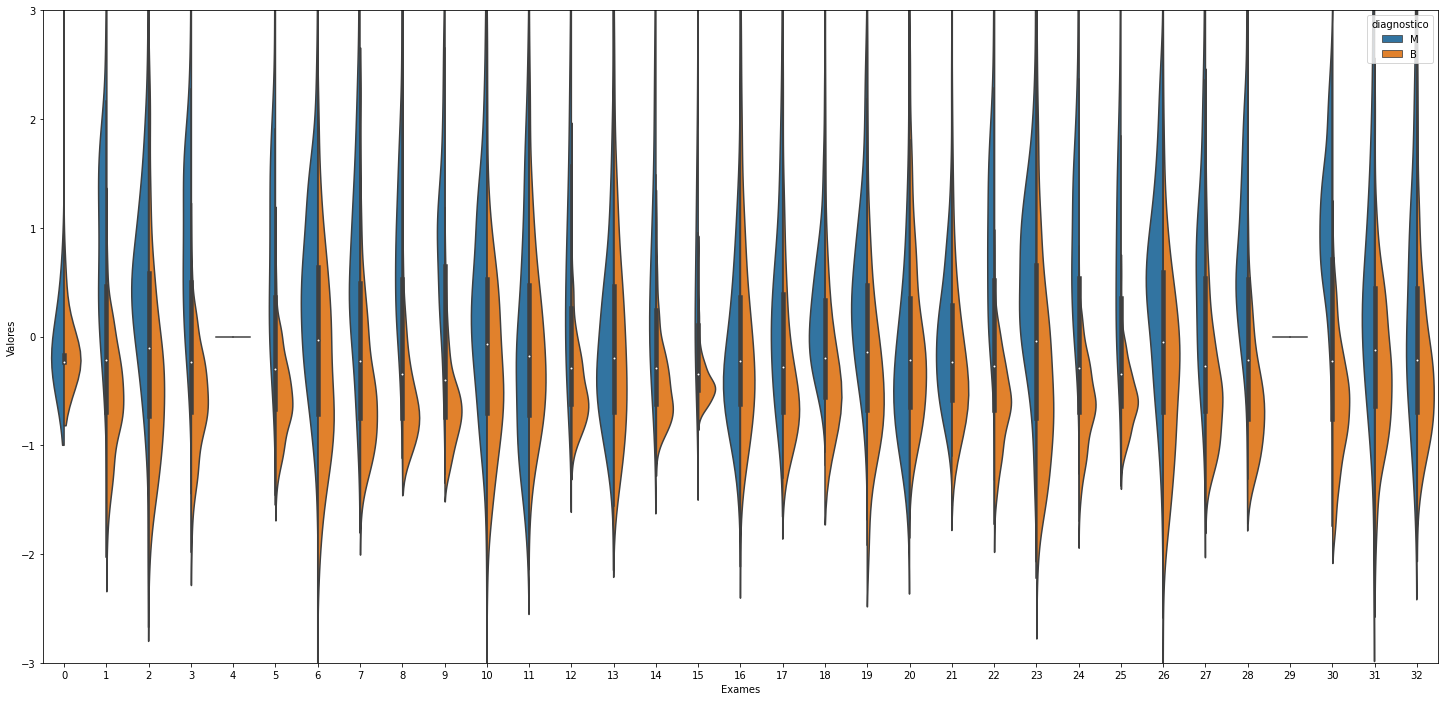

In [43]:
padronizador = StandardScaler()
padronizador.fit(dados_v1.drop(['diagnostico'], axis = 1))
dados_v2 = padronizador.transform(dados_v1.drop(['diagnostico'], axis = 1))
dados_v2 = pd.DataFrame(data = dados_v2)

pd.concat([dados_v1[['id','diagnostico']],dados_v2],axis =1)


dados_plot = pd.concat([dados_v1[['id','diagnostico']],dados_v2],axis =1)
dados_plot = dados_plot.drop(['id'], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'Exames', value_name = 'Valores')
dados_plot
plt.figure(figsize = (25,12))
sns.violinplot(x = 'Exames', y = 'Valores', hue = 'diagnostico', data = dados_plot,split = True)
plt.ylim(-3,3)


Pelo gráfico acima consegui concluir que podemos retirar as colunas do exame 4 e 29 pois são constantes

In [54]:
def classificar(valores_x):
  np.random.seed(123143)
  x_treino, x_teste, y_treino, y_teste = train_test_split(valores_x, y, test_size = 0.3, random_state = 123143)

  classificador = RandomForestClassifier(n_estimators = 100)
  classificador.fit(x_treino,y_treino)

  print('Resultado da Classificação: %.2f%%' %(classificador.score(x_teste, y_teste)*100))

In [55]:
dados_v3 = dados_v2.drop([4,29],axis = 1)

In [56]:
classificar(dados_v3)

Resultado da Classificação: 92.40%
